In [1]:
import os
import sys
import json
import numpy as np
import torch
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import random

sys.path.append('./src')
from dataset import HDMdataset
from models import IT2P_history, IT2P_nonhistory
from utils import generate_spatial_batch
from model_test import test_history, test_nonhistory

In [2]:
dictionary = json.load(open('./data/dictionary.json', 'r'))
split_info = json.load(open('./data/split.json', 'r'))

### Set below history_flag as True to add history information in training.

In [3]:
history_flag = True

In [4]:
data_dir = './data'
split = 1
is_train =  False
dataset = HDMdataset(data_dir, split, split_info, dictionary, is_train, is_seq=True)
dataloader = DataLoader(dataset, batch_size=1, shuffle=True)

In [5]:
device = 'cuda'

if history_flag:
    model = IT2P_history(512, 2, dictionary, 300).to(device)
    model.load_state_dict(torch.load('./models/history_recent.pth'))
else:
    model = IT2P_nonhistory(512, 2, dictionary, 300).to(device)
    model.load_state_dict(torch.load('./models/nonhistory_recent.pth'))
model.eval()

spatial_coords = torch.FloatTensor(generate_spatial_batch(1)).permute(0, 3, 1, 2).to(device)
print('loaded model')

loaded model


In [6]:
seed = 1991
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
torch.backends.cudnn.deterministic=True

move the rearmost red block to the left of the foremost red block


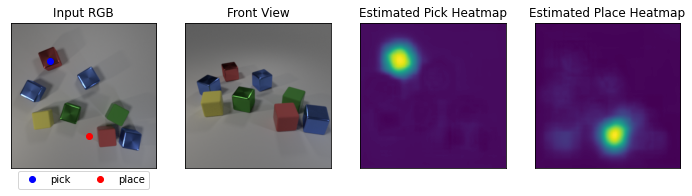

move the yellow block to the top of the last moved red block


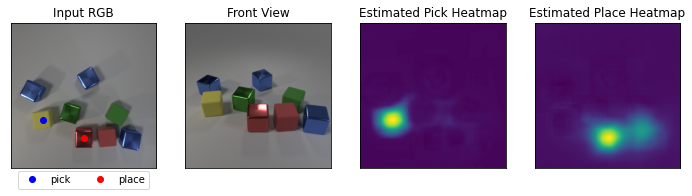

move the red block that is at right of the first moved red block to the back of the non-metal green block


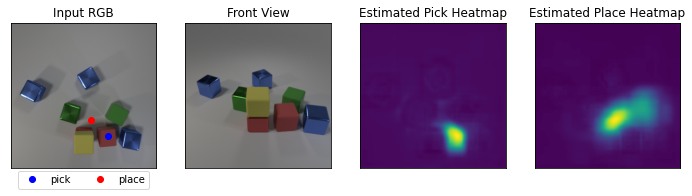

move the green block in front of the right red block to the right of the red block under the yellow block


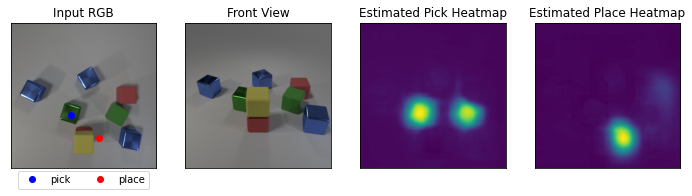

move the green block a little bit to the front so that it can be on the front left corner of the workspace


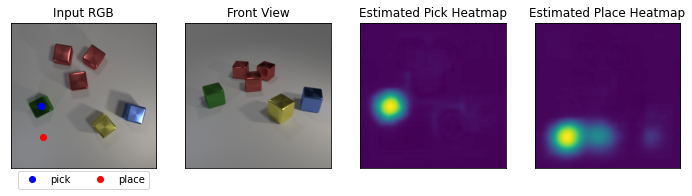

move the blue block above the block that you moved before


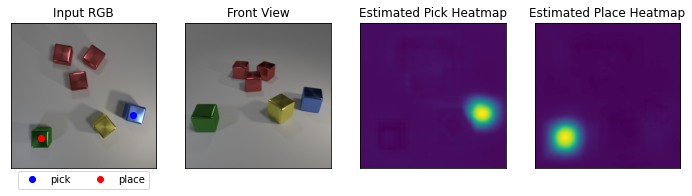

move the leftmost red block to the center front


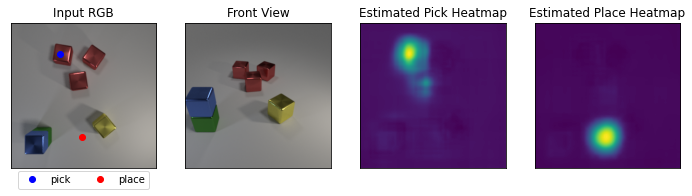

move the red block at center to the right of the first moved block


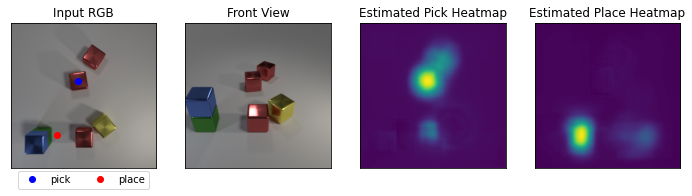

straighten and move the yellow block to the rear right of the rightmost blue block


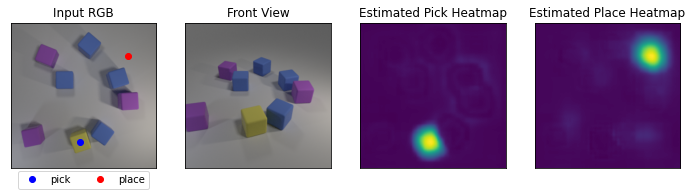

stack the rearmost purple block above the yellow block


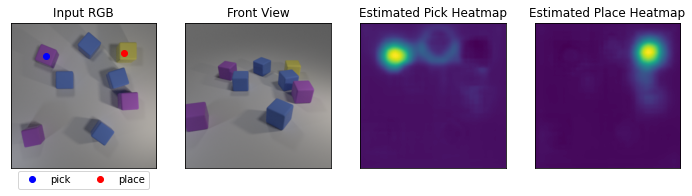

straighten and move the blue block behind the purple block between the rearmost blue block and the initially moved yellow block


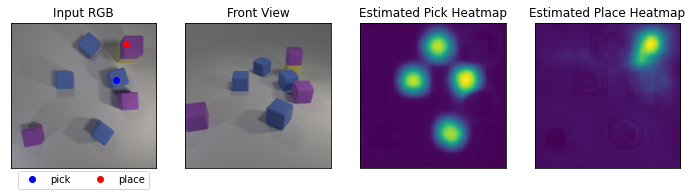

move the purple block in the right center side to the center left


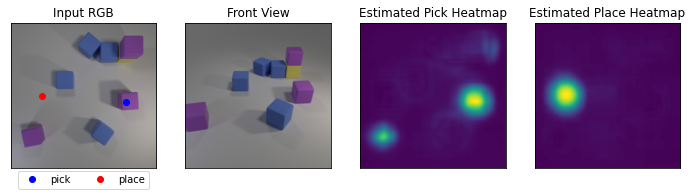

move the foremost purple block to the front of the moved yellow block


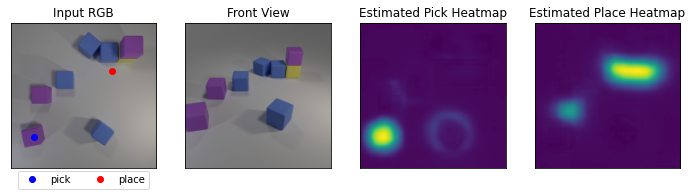

straighten and move the leftmost blue block to the right of the foremost blue block so that the foremost blue block's right corner touches the moved block's rear left corner


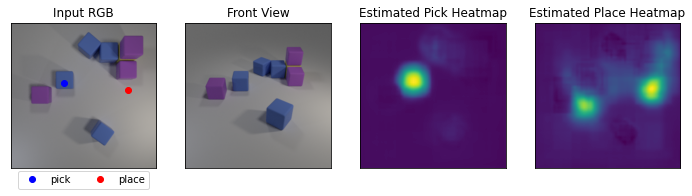

place the foremost blue block to the rear right corner


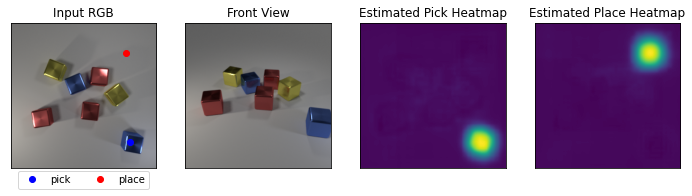

move the middle placed red metal block above the block that you just moved


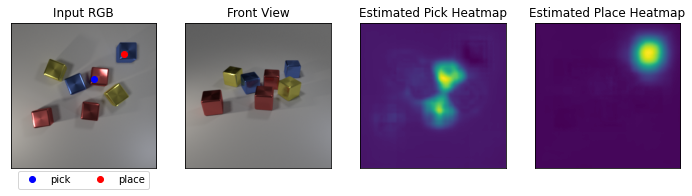

move the right yellow metal block to the rear side of the frontmost red metal block


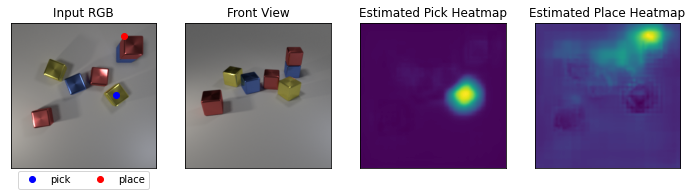

pick up the blue block that you have not moved and place it in front of the rearmost blue block


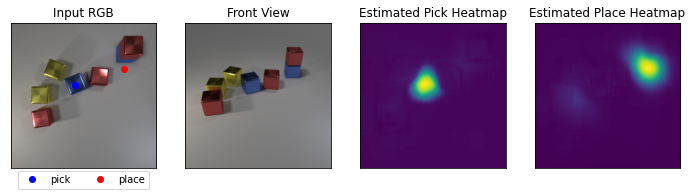

place the red block in the middle to the left side of the block that you moved at the first time


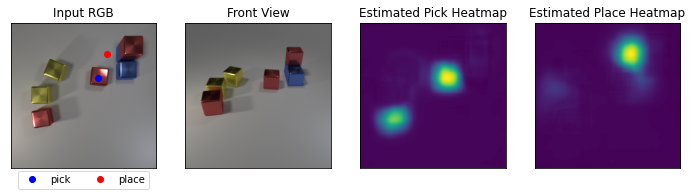

straighten and place the front green block behind the another green block at its back


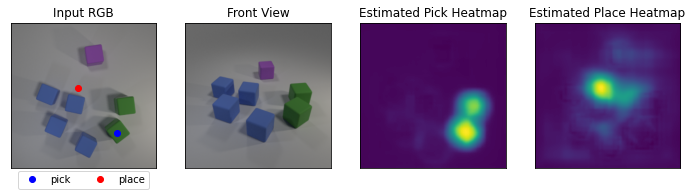

move the leftmost blue block above the block that you moved before


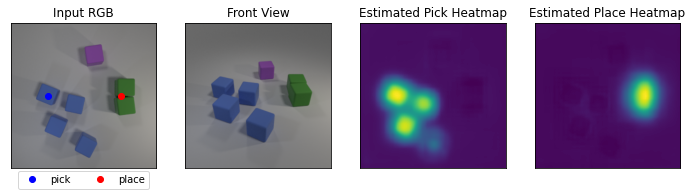

move the blue block nearest to the center to the left of the initially moved green block


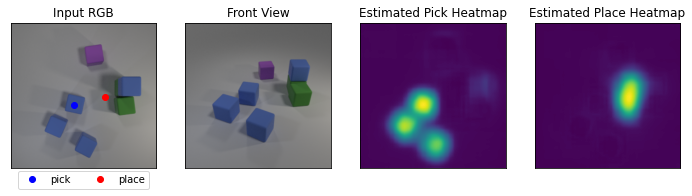

straighten and move the rearmost green block to the rear center


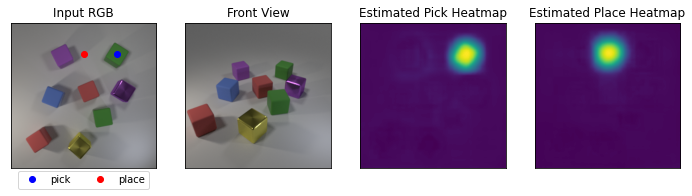

move the foremost green block to the right of the last moved green block


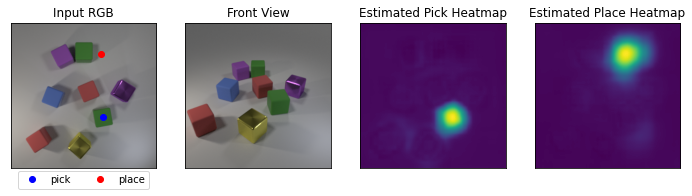

straighten and move the yellow block to the top of the green block that is on the right of the rearmost purple block


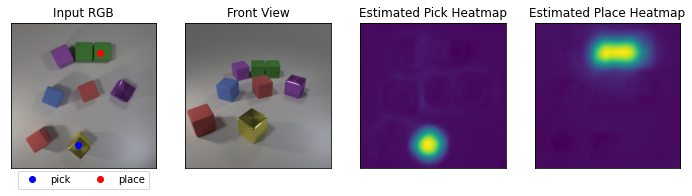

take the closest block from the moved blocks and place it in front of the first green block you moved


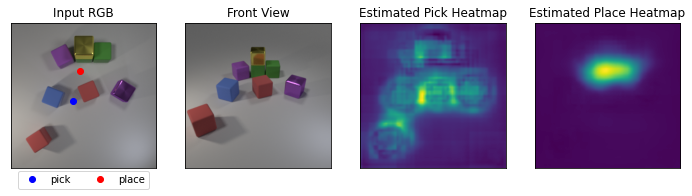

move the foremost red block to the left side of the red block which is on its rear left side


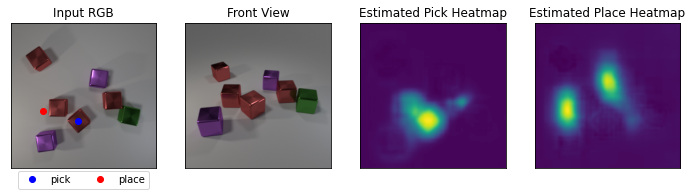

pick up the leftmost one among the red blocks you did not move and place it to the rear right corner of the of the middle red block


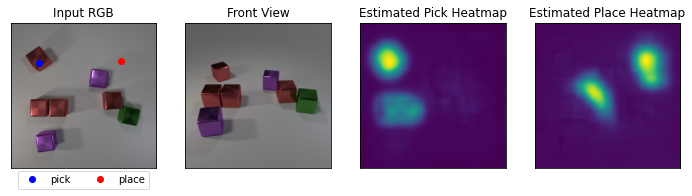

move the foremost purple block to the front of where the first moved red block was before it was moved


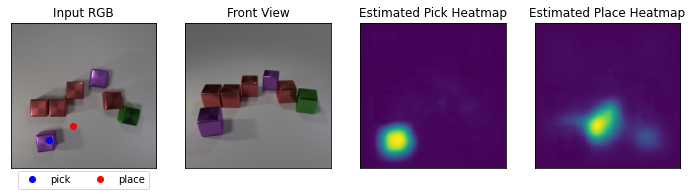

move the green block above the red block that you moved at the first beginning


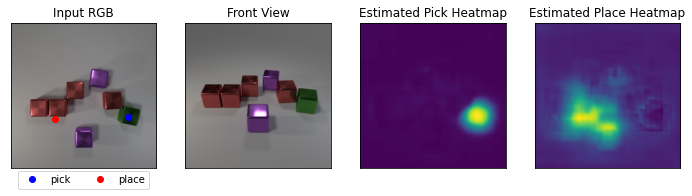

move the second leftmost red block to the front right


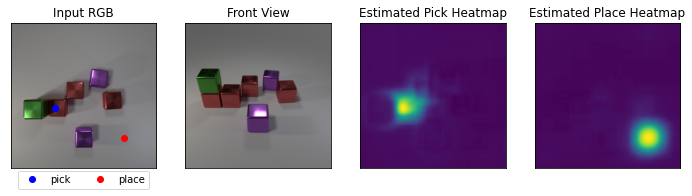

move the red block that you have not touched yet to the rear side of the leftmost red block


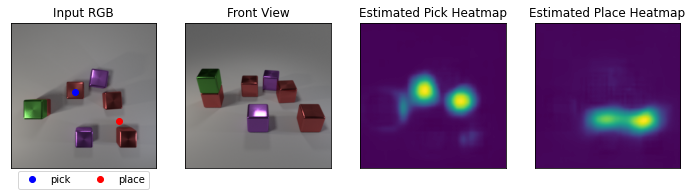

move the rear green block to the rear left


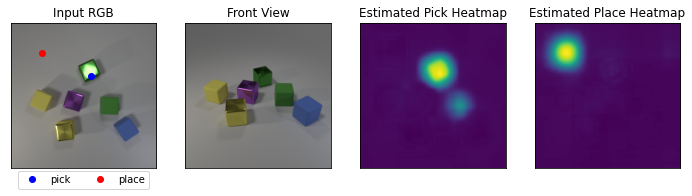

move the rubber yellow block above the left green block


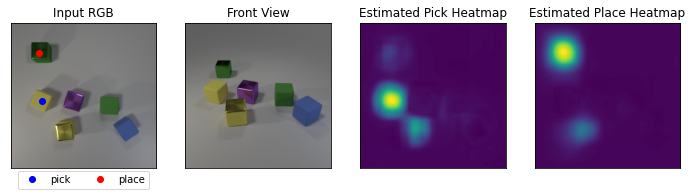

take the closest block from the moved blocks and place it in front of the rear green block


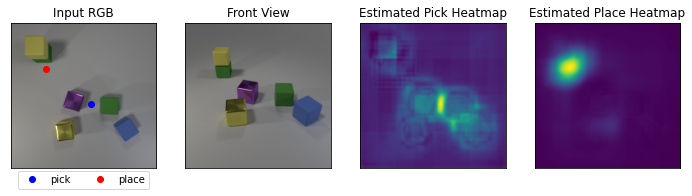

move the green block near the center to the rear right corner of the workspace


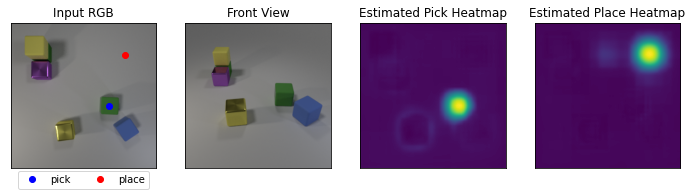

stack the yellow block that you did not move above the green block you just moved


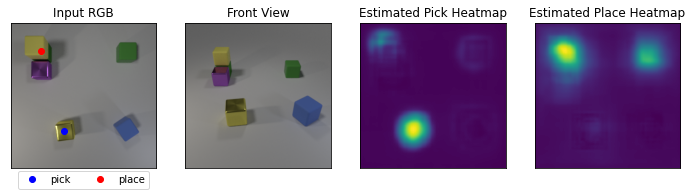

move the right red block to the center right


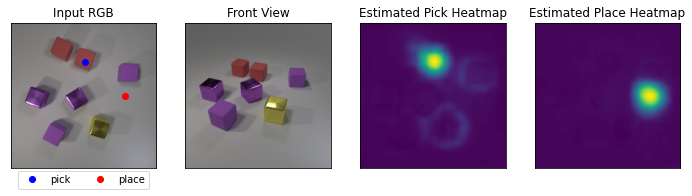

move the purple block at the center behind the purple block that was just moved


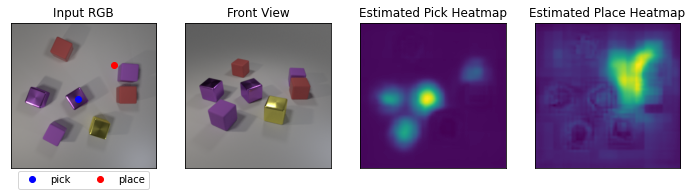

move the purple block behind the red block to the top of that red block


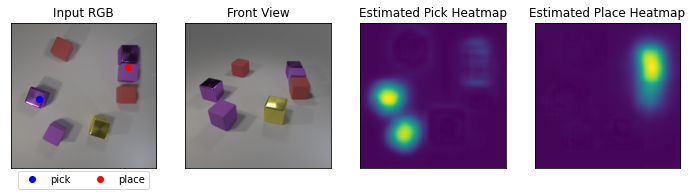

move the front yellow block to the back of the red block that was moved initially


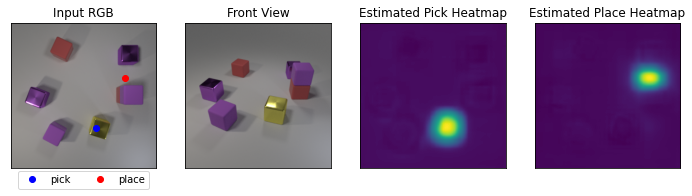

move the metal purple block on the center left to the left of the red block that was moved initially


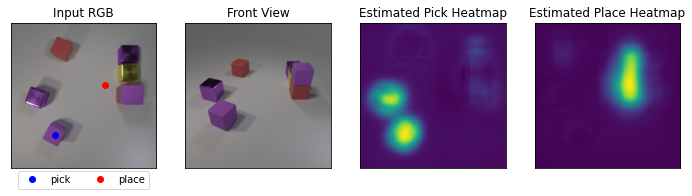

straighten and move the red block to the center next to the metal purple block


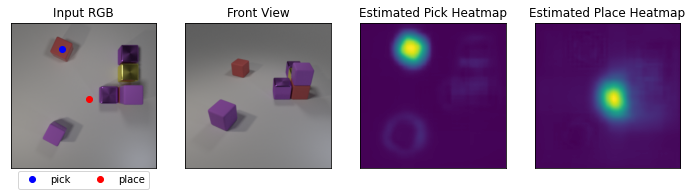

put the foremost blue metal block to the rear right corner


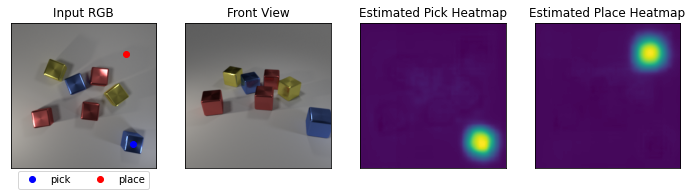

place the center red block above the rear right blue block


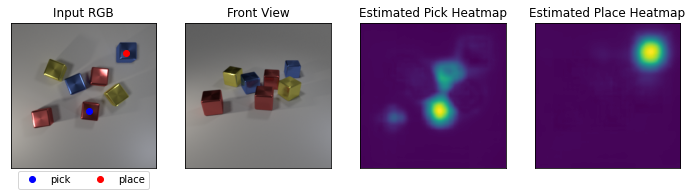

place the right yellow block behind the leftmost red block


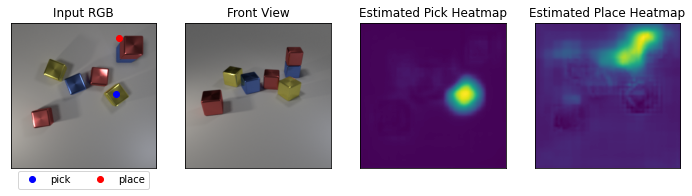

place the left blue block in front of the block that you moved at the first time


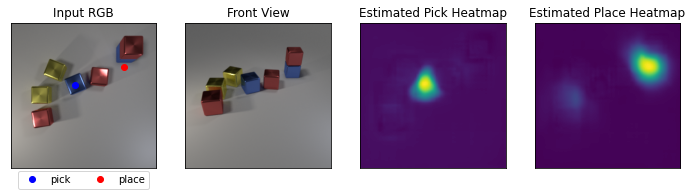

move the middle placed red metal block to the left side of the rearmost red metal block


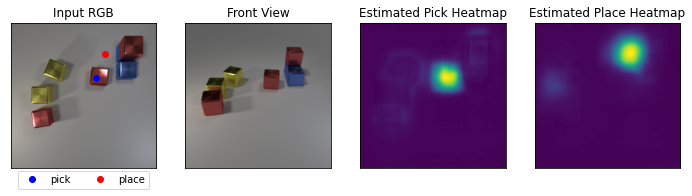

straighten and move the green block to the front left corner


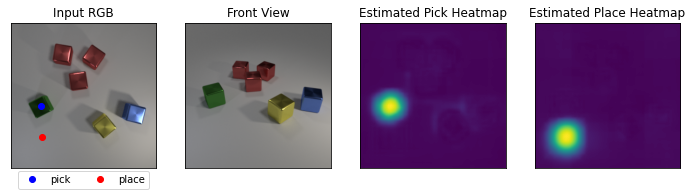

move the blue block to the top of the green block


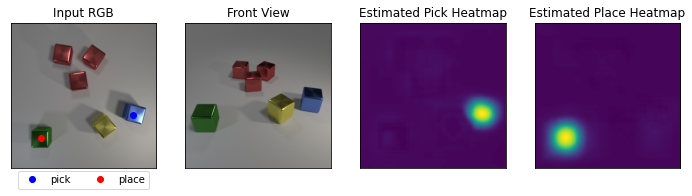

move the leftmost red block to the center front


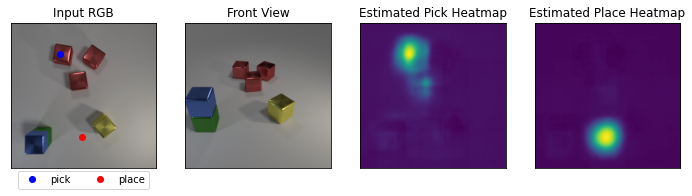

pick up the front one among the red blocks that you did not move and place it to the right side of the green block


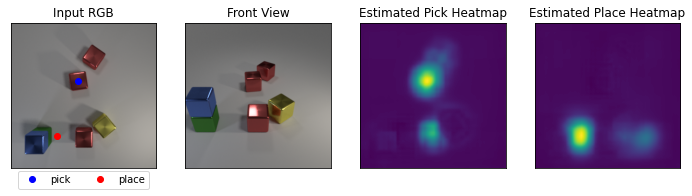

move the rear red block to the front center


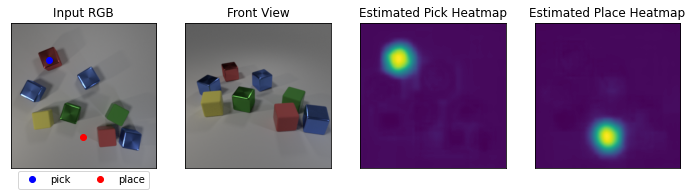

move the yellow block above the leftmost red block


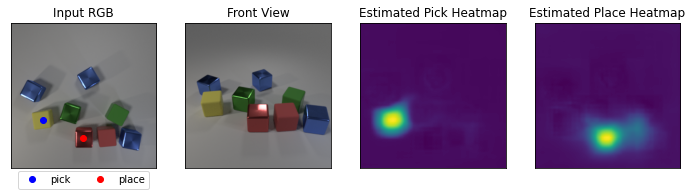

move the red block that is at right of the first moved red block to the back of the non-metal green block


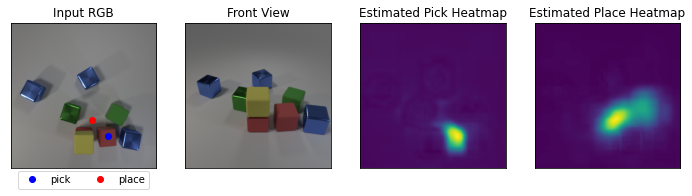

move the right green block to the right side of blocks at the front that you moved before


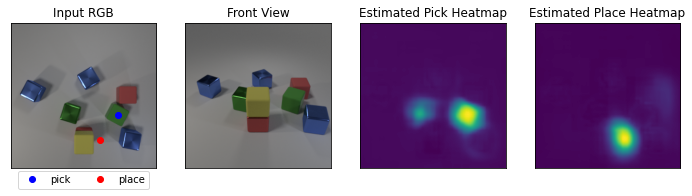

move the gold block to the right of the rear green block


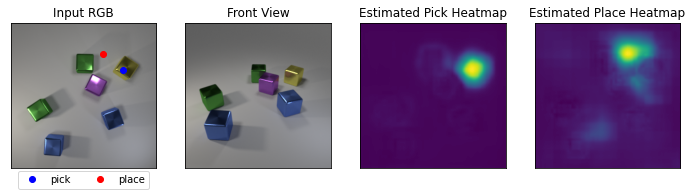

move the left blue block above the gold block


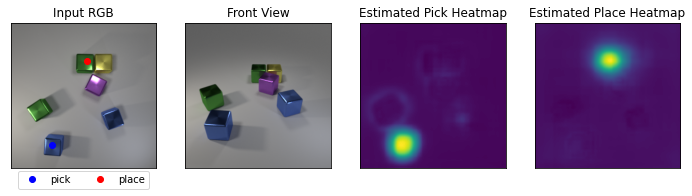

pick up the closest tilted block from the moved blocks and place it to the right side of the yellow block


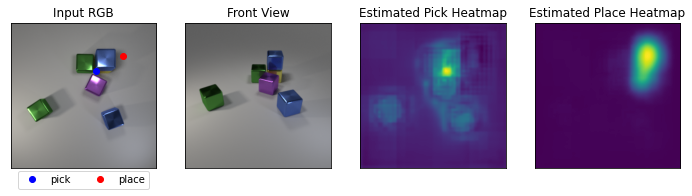

move the rear right green block to the top of the last moved purple block


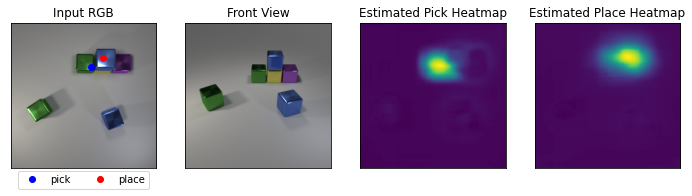

straighten and move the leftmost yellow block to the left of the rearmost green block


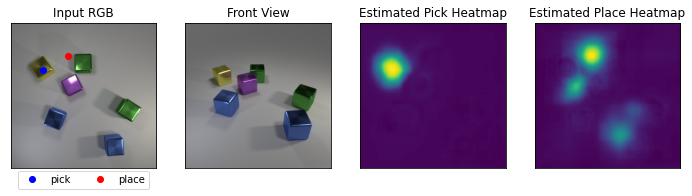

move the front blue block to the top of the yellow block that was just moved


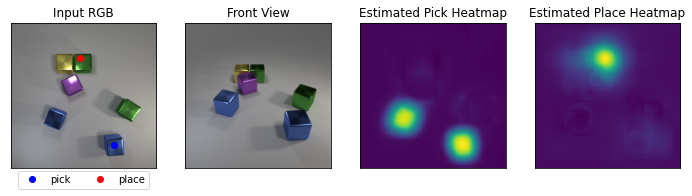

straighten and move the purple block to the left of the yellow block that was moved before


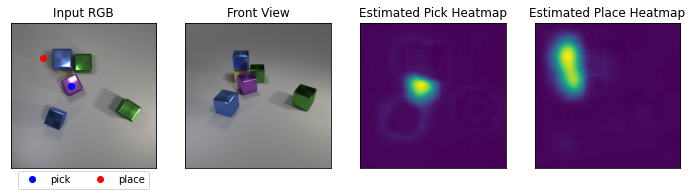

move the rearmost green block to the top of the purple block


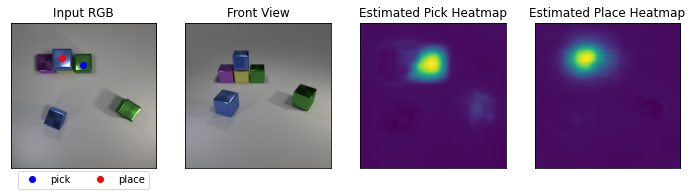

rotate the left purple block by 30 degrees and align it with the right side of the foremost red block


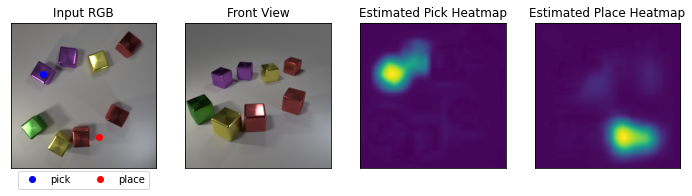

take the red block next to the previously moved block and stack it on the previous block


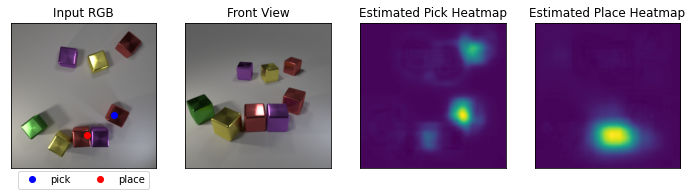

attach the closest red block to the right side of the blocks you moved


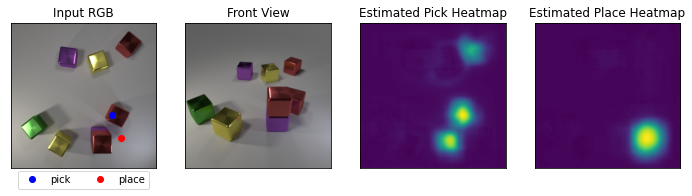

rotate the rearmost red block by 45 degrees and align it with the left side of the first purple block you moved


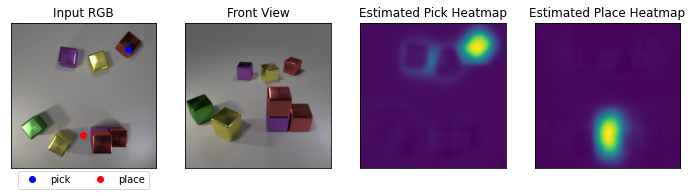

place the yellow block closest to the moved blocks to the right side of the rightmost red block


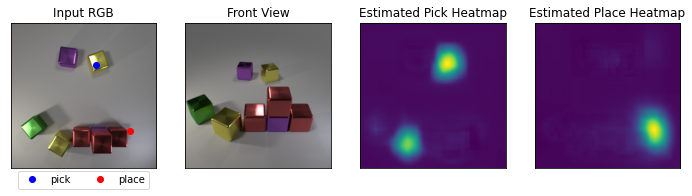

move the right green block to the center and to the front


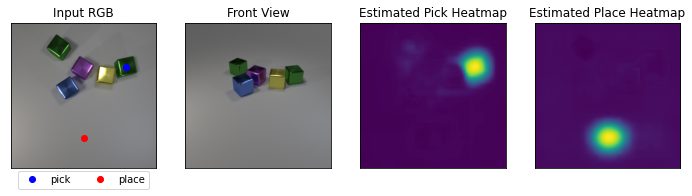

move the blue block to the top of the green block on front center


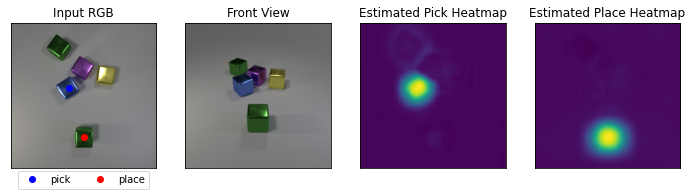

straighten and move the rearmost green block to the center left


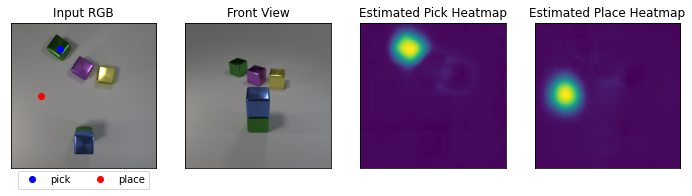

move the purple block to the back of the initially moved green block


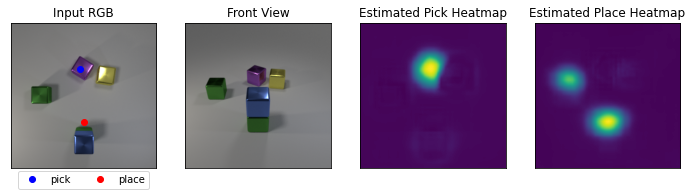

move the green block a little bit to the front so that it can be on the front right corner of the workspace


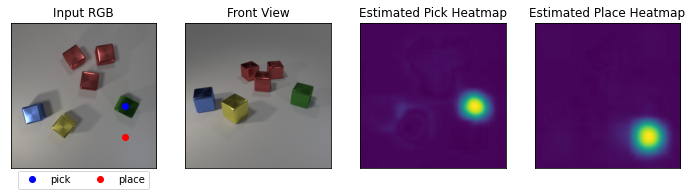

move the blue block to the top of the last moved block


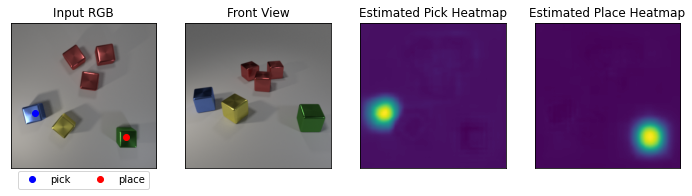

move the rightmost red block to the front right side of the gold block


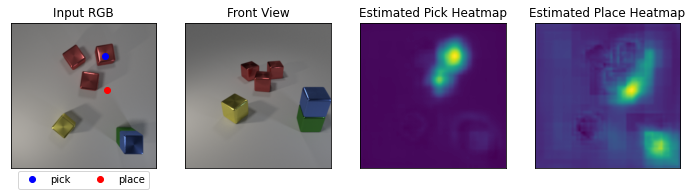

move the red block at center to the left of the first moved block


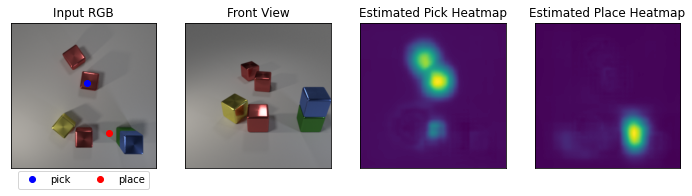

In [7]:
%matplotlib inline
pick_color = 'blue'
place_color = "red"

for i in range(5):
    samples = next(iter(dataloader))
    test = False
    for s in samples:
        if s['implicit'][0] and s['explicit'][0]:
            test = True

    if test:
        if history_flag:
            total_preds = test_history(model, samples, spatial_coords)
        else:
            total_preds = {'pick':[], 'place':[]}
            for sample in samples:
                curr_preds = test_nonhistory(model, sample, spatial_coords)
                total_preds['pick'].append(curr_preds['pick'])
                total_preds['place'].append(curr_preds['place'])
                
        for i in range(len(samples)):
            sample = samples[i]
            fig1, ax1 = plt.subplots(1, 4, figsize=(12, 3))

            ax1[0].imshow(0.5*(sample['start_img'][0].permute(1, 2, 0)+1))
            ax1[1].imshow(sample['front_img'][0].permute(1, 2, 0))
            ax1[2].imshow(0.5*(total_preds['pick'][i]+1))
            ax1[3].imshow(0.5*(total_preds['place'][i].squeeze()+1))

            pick_point = np.where(total_preds['pick'][i] == np.max(total_preds['pick'][i]))
            place_point = np.where(total_preds['place'][i] == np.max(total_preds['place'][i]))

            ax1[0].plot(pick_point[1], pick_point[0], 'o', color=pick_color)
            ax1[0].plot(place_point[1], place_point[0], 'o', color=place_color)
            ax1[0].legend(['pick', 'place'], bbox_to_anchor=(0.5, -0.175), loc='lower center', ncol=2)

            ax1[0].set_title('Input RGB')
            ax1[1].set_title('Front View')
            ax1[2].set_title('Estimated Pick Heatmap')
            ax1[3].set_title('Estimated Place Heatmap')

            print(sample['orig_sentence'][0])

            for a in ax1:
                a.set_xticks([])
                a.set_yticks([])
            plt.pause(0.1)
        print('='*100)